# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
all_data = pd.merge(study_results, mouse_metadata, how='left')

# Display the data table for preview
all_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(all_data["Mouse ID"].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = all_data[all_data.duplicated(['Mouse ID', 'Timepoint'])]
print(dupes)
dropID = [137, 360, 681, 869, 1111]
drop_data = all_data.drop(dropID)
#I hard-coded this, I know. But in the future, I would look for a way to iterate through the dataframe that shows my duplicates and append that to the dropID list.
#Also, the code below is redundant, I suppose.

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
137      g989          0           45.000000                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
869      g989         15           53.442020                 0     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
137   Female          21          26  
360   Female          21          26  
681   Female          21          26  
869   Female          21          26  
1111  Female          21          26  


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filtered_data = all_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
filtered_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(filtered_data["Mouse ID"].unique())
#Couldn't get this to be 248. Indexing issue? I'm still getting the correct numbers in the data set below.

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
avg = filtered_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
med = filtered_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = filtered_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev = filtered_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
std_err = filtered_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
sum_stats = pd.DataFrame({'Mean': avg, 'Median': med, 'Variance': var, 'Standard Deviation': std_dev, 'Standard Error': std_err})
sum_stats


,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_results = filtered_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_results

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

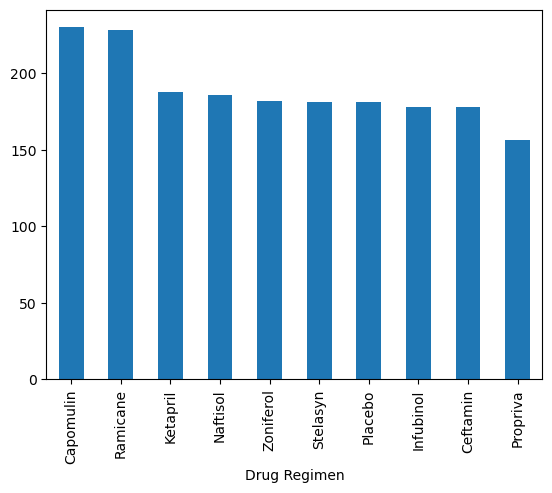

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_drug_counts = filtered_data['Drug Regimen'].value_counts()
plotdata = total_drug_counts.plot.bar(x='Drug Regimen')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ketapril'),
  Text(2, 0, 'Naftisol'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Stelasyn'),
  Text(5, 0, 'Ramicane'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Zoniferol'),
  Text(8, 0, 'Placebo'),
  Text(9, 0, 'Ceftamin')])

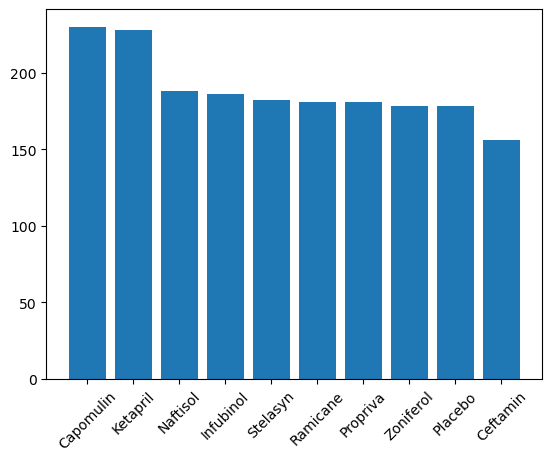

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(filtered_data['Drug Regimen'].unique(), total_drug_counts)
plt.xticks(rotation = 45)
#Not sure why the top bit shows up, but here we are nonetheless


Sex
Male      50.741525
Female    49.258475
Name: proportion, dtype: float64


<Axes: ylabel='proportion'>

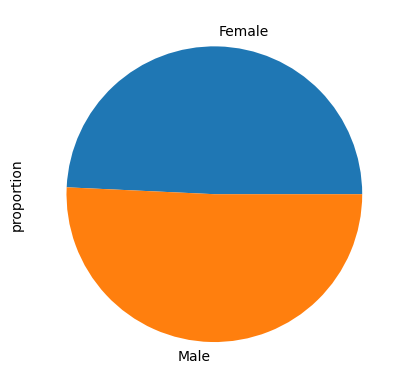

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_ratio = (filtered_data['Sex'].value_counts(normalize=True)*100) #<- ChatGPT is pretty cool
print(gender_ratio)
gender_ratio.groupby(['Sex']).sum().plot(kind='pie')

<Axes: ylabel='proportion'>

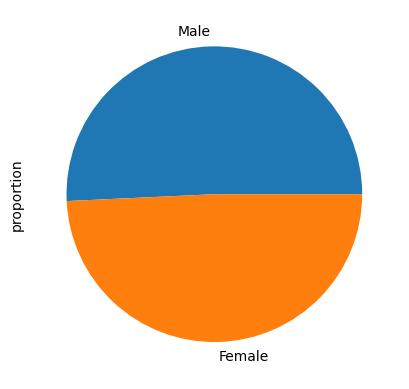

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_ratio.plot.pie()

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
MouseID = []    #| Initialize lists. We will populate these with the IDs
max_volume = [] #| and the largest tumor volumes respectively.
drug_regimen = []

# Start by getting the last (greatest) timepoint for each mouse
sorted_data = filtered_data.sort_values(by=['Mouse ID', 'Timepoint']) #| Sort by Mouse ID and Timepoint
sorted_data = sorted_data.reset_index(drop=True)                      #| Create new indices of the sorted dataframe.
MouseID.append(sorted_data['Mouse ID'][0])                            #| Put the first element of the Dataframe in the list for future comparisons

for i in sorted_data.index:                                         #| This for loop finds the largest values of 
    if sorted_data['Mouse ID'][i] not in MouseID:                   #| each mouse in the dataframe.
        MouseID.append(sorted_data['Mouse ID'][i])                  #|
        max_volume.append(sorted_data['Tumor Volume (mm3)'][i-1])   #|
        drug_regimen.append(sorted_data['Drug Regimen'][i])
    if i == 1887: #Hard-coded. Couldn't quite figure out how to get the last value in this data frame in a usable data type.
        max_volume.append(sorted_data['Tumor Volume (mm3)'][i]) # Without this line, the last bit isn't caught.
        drug_regimen.append(sorted_data['Drug Regimen'][i])
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

high_volume_df = pd.DataFrame({
    'Mouse ID': MouseID,
    'Max Volume': max_volume,
    'Drug Regimen': drug_regimen
})



['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ramicane', 'Ramicane', 'Ketapril', 'Stelasyn', 'Ramicane', 'Infubinol', 'Ramicane', 'Infubinol', 'Propriva', 'Zoniferol', 'Naftisol', 'Placebo', 'Stelasyn', 'Capomulin', 'Zoniferol', 'Ceftamin', 'Ceftamin', 'Naftisol', 'Capomulin', 'Ceftamin', 'Stelasyn', 'Infubinol', 'Zoniferol', 'Placebo', 'Zoniferol', 'Infubinol', 'Stelasyn', 'Ramicane', 'Zoniferol', 'Ketapril', 'Placebo', 'Ramicane', 'Placebo', 'Ketapril', 'Ketapril', 'Infubinol', 'Propriva', 'Zoniferol', 'Zoniferol', 'Ramicane', 'Ketapril', 'Naftisol', 'Placebo', 'Naftisol', 'Infubinol', 'Naftisol', 'Ramicane', 'Zoniferol', 'Stelasyn', 'Ketapril', 'Infubinol', 'Zoniferol', 'Ceftamin', 'Zoniferol', 'Ketapril', 'Capomulin', 'Naftisol', 'Ketapril', 'Capomulin', 'Zoniferol', 'Capomulin', 'Ketapril', 'Propriva', 'Propriva', 'Ramicane', 'Stelasyn', 'Propriva', 'Ketapril', 'Stelasyn', 'Ketapril', 'Ceftamin', 'Ramicane', 'Ramicane', 'Infubinol', 'Placebo', 'Capomulin', 'Propri

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


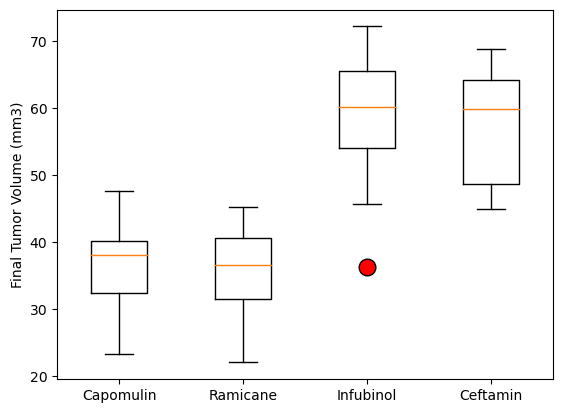

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

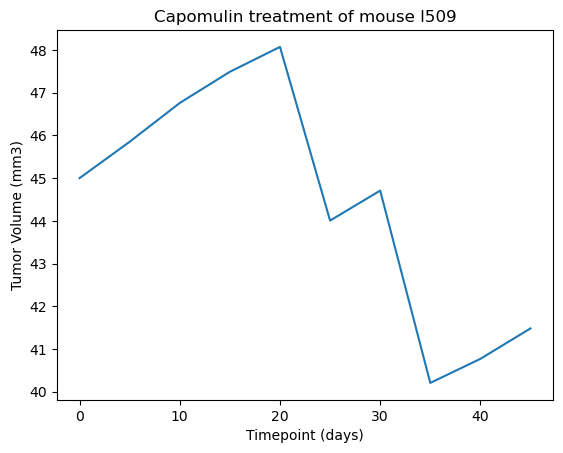

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


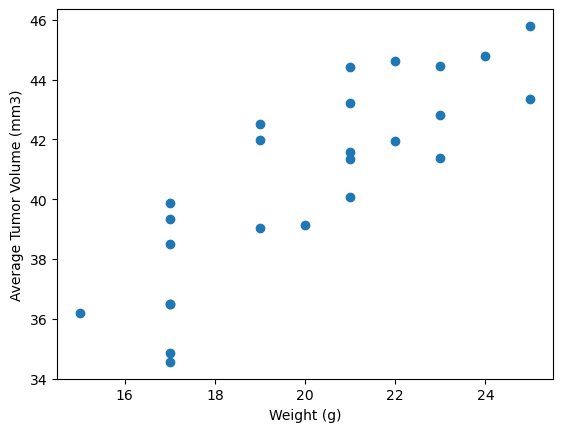

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


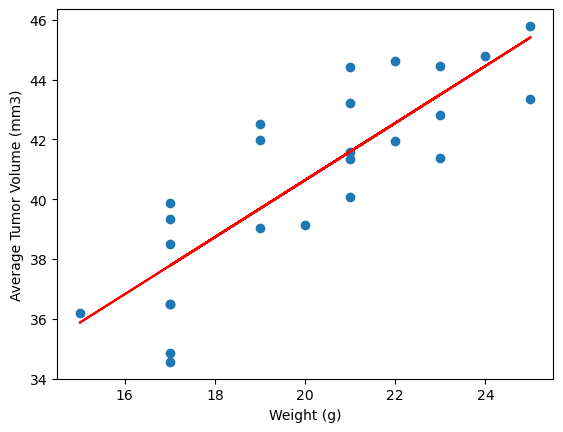

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
